# Split Cycle

This notebook contains examples from the paper "[Split Cycle: A New Condorcet Consistent Voting Method Independent of Clones and Immune to Spoilers]()" by Wesley H. Holliday and Eric Pacuit.  


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, Math

# Terminology

Refer to our paper for more details about the terminology and notation. 

Fix infinite sets $\mathcal{V}$ and $\mathcal{X}$ of *voters* and *candidates*, respectively. For $X\subseteq\mathcal{X}$, let $\mathcal{L}(X)$ be the set of all linear orders on $X$.

A **profile** is a function $\mathbf{P}: V(\mathbf{P})\to \mathcal{L}(X(\mathbf{P}))$ for some nonempty finite $V(\mathbf{P})\subseteq \mathcal{V}$ and nonempty finite $X(\mathbf{P})\subseteq \mathcal{X}$. We call $V(\mathbf{P})$ and $X(\mathbf{P})$ the sets of *voters in $\mathbf{P}$* and *candidates in $\mathbf{P}$*, respectively. We call $\mathbf{P}(i)$ voter $i$'s *ballot*, and we write '$x\mathbf{P}_iy$' for $(x,y)\in\mathbf{P}(i)$.

A **margin graph**  is a weighted directed graph such that the edge relation of the graph is asymmetric and either all weights of edges are even positive integers or all weights of edges are odd positive integers.

Let $\mathbf{P}$ be a profile and $a,b\in X(\mathbf{P})$. Then $Margin_\mathbf{P}(a,b)=|\{i\in V(\mathbf{P})\mid a\mathbf{P}_ib\}|-|\{i\in V(\mathbf{P})\mid b\mathbf{P}_ia\}|$.  The *margin graph of $\mathbf{P}$*, $\mathcal{M}(\mathbf{P})$, is the weighted directed graph whose set of vertices is $X(\mathbf{P})$ with an edge from $a$ to $b$ weighted by $Margin(a,b)$ when $Margin(a,b)>0$, in which case we say that *$a$ is majority preferred to $b$*. We write $a\overset{\alpha}{\to}_\mathbf{P}b\mbox{ if }\alpha = Margin_\mathbf{P}(a,b)> 0.$   


In [3]:
# import code for representing profiles
from voting.profile_optimized import *

# define some variables to simplify notation 
a=0
b=1
c=2
d=3
e=4
f=5

# candidate names are integers
cand_names_3 = [a,b,c]
cand_names_4 = [a,b,c,d]
cand_names_5 = [a,b,c,d,e]
cand_names_5 = [a,b,c,d,e,f]

# map candidate names to letters to match the notation in our papaer
cmap_abc = {a:"a", b:"b", c:"c"}
cmap_abcd = {a:"a", b:"b", c:"c", d:"d"}
cmap_abcde = {a:"a", b:"b", c:"c", d:"d", e:"e"}
cmap_abcdef = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f"}


In [4]:
# generate and display the margin graph
def display_margin_graph(prof): 
    # create marging graph
    mg = nx.DiGraph()
    mg.add_nodes_from([prof.cname(_) for _ in sorted(prof.candidates)])
    mg.add_weighted_edges_from([(prof.cname(c1),prof.cname(c2),prof.support(c1,c2) - prof.support(c2,c1))  
           for c1 in prof.candidates 
           for c2 in prof.candidates if c1 != c2 if prof.support(c1,c2) - prof.support(c2,c1) > 0])

    pos = nx.circular_layout(mg)
    nx.draw(mg, pos, font_size=20, node_color='blue', font_color='white',node_size=700, width=1, lw=1.5, with_labels=True)
    labels = nx.get_edge_attributes(mg,'weight')
    nx.draw_networkx_edge_labels(mg,pos,edge_labels=labels, label_pos=0.3)

    #nx.draw(mg)
    plt.title("Margin Graph")
    plt.show()


+---+---+---+
| 2 | 4 | 3 |
+---+---+---+
| b | c | a |
| a | b | c |
| c | a | b |
+---+---+---+


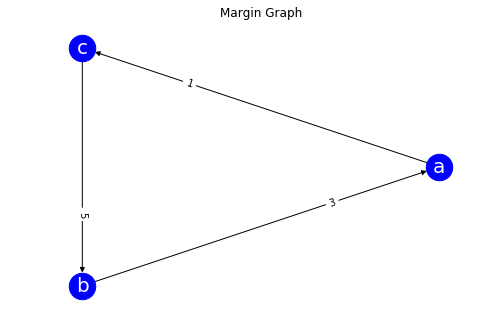

There is an edge from b to a since 6 voters rank b above a and 3 voters rank a above b. So, 


<IPython.core.display.Math object>

In [5]:
# an anonymous profile is a dictionary, associating with each linear order over the candidate 
#(represented as a tuple) the number of voters with that ranking (e.g., the size of the voting bloc)

# Example from pg. 5 in Section 1.1

# candidate names
cand_names=[a,b,c]

#candidate name map
cmap = cmap_abc

anon_prof = {(b, a, c): 2,
             (a, c, b): 3,
             (c, b, a): 4} 


# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap_abc) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

print "There is an edge from {} to {} since \
{} voters rank {} above {} and {} voters rank {} above {}. So, ".format(cmap[b], cmap[a],
                                                                  prof.support(b,a),
                                                                  cmap[b],cmap[a],
                                                                  prof.support(a,b),
                                                                  cmap[a], cmap[b])    
display(Math("Margin({},{}) = {}.".format(cmap[b],cmap[a],prof.margin(b,a))))

## Voting Method

A **voting method** is a function $F$ on the domain of all profiles such that for any profile $\mathbf{P}$, $\varnothing\neq F(\mathbf{P})\subseteq X(\mathbf{P})$. We call $F(\mathbf{P})$ the set of *winners for $\mathbf{P}$ under $F$*.


In [6]:
#import voting methods
from voting.voting_methods_for_optimized import *

# display winners of a voting metho
def display_winners(vm, prof):
    print  "{} winners: {}".format(vm.__doc__, "{" + ", ".join([prof.cname(_) for _ in vm(prof)]) + "}")


+---+---+---+---+
| 2 | 3 | 3 | 1 |
+---+---+---+---+
| a | b | c | c |
| b | c | b | a |
| c | a | a | b |
+---+---+---+---+


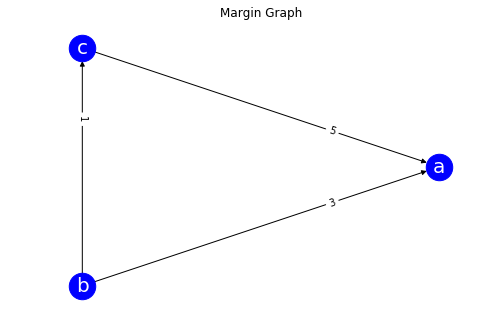

Ranked Choice winners: {b}


In [7]:

# Example from pg. 6 in Section 1.2
anon_prof1 = {(a, b, c): 2,
              (b, c, a): 3,
              (c, a, b): 1,
              (c, b, a): 3} 


# create a profile given the anonymous profile and the candidate names 
prof1 = create_profile_opt_from_anon_profile(anon_prof1, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof1.display_anon()

# display the margin graph
display_margin_graph(prof1)

# Winners for various voting methods: 
# hare - also called ranked choice voting, see Appendix C.6
# plurality, see Appendix C.7
display_winners(hare, prof1)



Illustrating the strong no show paradox - Section 1.2


+---+---+---+---+
| 2 | 3 | 3 | 1 |
+---+---+---+---+
| a | b | c | c |
| b | c | b | a |
| c | a | a | b |
+---+---+---+---+


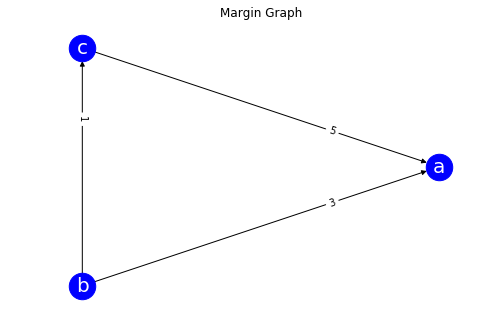

Ranked Choice winners: {b}
Plurality winners: {c}


Two voters are added with the ranking (a,b,c)

+---+---+---+---+
| 4 | 3 | 3 | 1 |
+---+---+---+---+
| a | b | c | c |
| b | c | b | a |
| c | a | a | b |
+---+---+---+---+


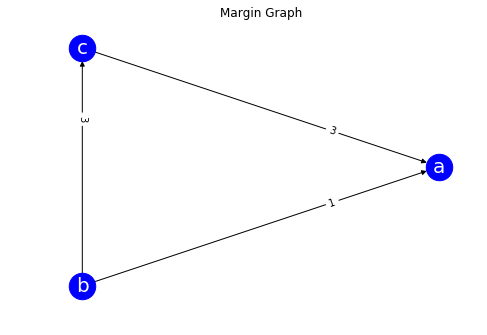

Ranked Choice winners: {c}
Plurality winners: {a, c}


In [8]:
print "\nIllustrating the strong no show paradox - Section 1.2\n\n"
# candidate names
cand_names=[a,b,c]

#candidate name map
cmap = cmap_abc


# Example from pg. 6 in Section 1.2
anon_prof1 = {(a, b, c): 2,
              (b, c, a): 3,
              (c, a, b): 1,
              (c, b, a): 3} 


# create a profile given the anonymous profile and the candidate names 
prof1 = create_profile_opt_from_anon_profile(anon_prof1, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof1.display_anon()

# display the margin graph
display_margin_graph(prof1)

# Winners for various voting methods: 
# hare - also called ranked choice voting, see Appendix C.6
# plurality, see Appendix C.7
display_winners(hare, prof1)
display_winners(plurality, prof1)

print "\n\nTwo voters are added with the ranking ({},{},{})\n".format(cmap[a],cmap[b],cmap[c])
# Example from pg. 6 in Section 1.2
anon_prof2 = {(a, b, c): 4,
              (b, c, a): 3,
              (c, a, b): 1,
              (c, b, a): 3} 


# create a profile given the anonymous profile and the candidate names 
prof2 = create_profile_opt_from_anon_profile(anon_prof2, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof2.display_anon()

# display the margin graph
display_margin_graph(prof2)

# Winners for various voting methods: 
# hare - also called ranked choice voting, see Appendix C.6
# plurality, see Appendix C.7
display_winners(hare, prof2)
display_winners(plurality, prof2)

## Split Cycle

Given a margin graph $\mathcal{M}$, a **simple cycle in $\mathcal{M}$** is a sequence $\langle x_1,\dots,x_n\rangle$ of nodes from $\mathcal{M}$ such that $n>1$, and for all distinct $i,j\in \{1,\dots,n\}$, $x_i=x_j$ if and only if $i,j\in \{1,n\}$ (i.e., all nodes are distinct except $x_1=x_n$), and for all $i\in \{1,\dots,n-1\}$, we have $x_i\to x_{i+1}$, where $\to $ is the edge relation of the graph. By 'cycle' we always mean a simple cycle.

Let $\mathbf{P}$ be a profile and $\rho$ a simple cycle in $\mathcal{M}(\mathbf{P})$. The **splitting number** of $\rho$, $Split\#(\rho)$, is the smallest margin between consecutive candidates in $\rho$


Let $\mathbf{P}$ be a profile and $a,b\in X(\mathbf{P})$. Then **$a$ defeats $b$ in $\mathbf{P}$** if $Margin_\mathbf{P}(a,b)>0$ and $Margin_\mathbf{P}(a,b)>Split\#(\rho)$ for every simple cycle $\rho$ in $\mathcal{M}(\mathbf{P})$ containing $a$ and $b$. A candidate $b$ is **undefeated in $\mathbf{P}$** if there is no candidate that defeats $b$.


For any profile $\mathbf{P}$, the set of **Split Cycle winners**, $SC(\mathbf{P})$, is the set of candidates who are undefeated in $\mathbf{P}$.



In [9]:
# Splity Cycle implementation 
def split_cycle(prof):
    """Split Cycle"""
    
    # create margin graph
    mg = generate_margin_graph(prof) 

    # find cycle numbers for each candidate
    cycle_number = {cs:0 for cs in combinations(prof.candidates,2)}
    for cycle in nx.simple_cycles(mg): # for each cycle in mg
        
        # get all the margins (i.e., the weights) of the edges in the cycle
        margins = list() 
        for idx,c1 in enumerate(cycle): 
            next_idx = idx + 1 if (idx + 1) < len(cycle) else 0
            c2 = cycle[next_idx]
            margins.append(mg[c1][c2]['weight'])
            
        min_margin = min(margins) # the min is the minimal margin needed to break the cycle
        
        # check if should update the cycle number for each candidate
        for cands in cycle_number.keys():
            if cands[0] in cycle and cands[1] in cycle:
                cycle_number[cands] = min_margin if min_margin > cycle_number[cands] else cycle_number[cands]
    
    # generate the beaten graph, where A beats B if margin(A,B) > cycle(A,B)
    
    cycle =  lambda c1,c2: cycle_number[[cs for cs in cycle_number.keys() if set(cs) == set([c1,c2])][0]]
    G = nx.DiGraph()
    G.add_nodes_from(prof.candidates)
    G.add_edges_from([(c1,c2)  
           for c1 in prof.candidates 
           for c2 in prof.candidates if c1 != c2 if prof.margin(c1,c2)  > cycle(c1,c2)])

    winners = unbeaten_candidates(G)
    return sorted(list(set(winners)))

# Return cycle numbers and split numbers
def split_cycle_with_data(prof):
    """Split Cycle"""
    
    # create margin graph
    mg = generate_margin_graph(prof) 

    # find cycle numbers for each candidate
    cycle_number = {cs:0 for cs in combinations(prof.candidates,2)}
    split_number = dict()
    for cycle in nx.simple_cycles(mg): # for each cycle in mg
        
        # get all the margins (i.e., the weights) of the edges in the cycle
        margins = list() 
        for idx,c1 in enumerate(cycle): 
            next_idx = idx + 1 if (idx + 1) < len(cycle) else 0
            c2 = cycle[next_idx]
            margins.append(mg[c1][c2]['weight'])
            
        min_margin = min(margins) # the min is the minimal margin needed to break the cycle
        
        split_number.update({tuple(cycle): min_margin})
        # check if should update the cycle number for each candidate
        for cands in cycle_number.keys():
            if cands[0] in cycle and cands[1] in cycle:
                cycle_number[cands] = min_margin if min_margin > cycle_number[cands] else cycle_number[cands]
    
    # generate the beaten graph, where A beats B if margin(A,B) > cycle(A,B)
    
    cycle =  lambda c1,c2: cycle_number[[cs for cs in cycle_number.keys() if set(cs) == set([c1,c2])][0]]
    G = nx.DiGraph()
    G.add_nodes_from(prof.candidates)
    G.add_edges_from([(c1,c2)  
           for c1 in prof.candidates 
           for c2 in prof.candidates if c1 != c2 if prof.margin(c1,c2)  > cycle(c1,c2)])

    winners = unbeaten_candidates(G)
    return sorted(list(set(winners))), cycle_number, split_number

# Display all the Split Cycle data
def display_split_cycle_data(prof, cmap):
    
    sc_winners, cycle_number, split_number = split_cycle_with_data(prof)

    display_winners(split_cycle, prof)
    print "\n---\n"

    for cands in cycle_number.keys():
        print "CycleNum({}, {}) = {}".format(cmap[cands[0]],cmap[cands[1]], cycle_number[cands])

    print "\n---\n"
    for cycle in split_number.keys():
        print "SplitNum({}) = {}".format(",".join([cmap[_] for _ in cycle]), split_number[cycle])
    
    print "\n"



## Example from Section 3, item 1, pg. 11

+---+---+---+---+---+
| 5 | 2 | 4 | 4 | 2 |
+---+---+---+---+---+
| a | b | c | b | c |
| c | c | b | a | a |
| b | a | a | c | b |
+---+---+---+---+---+


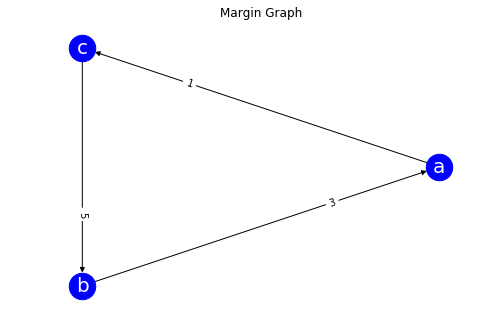

Split Cycle winners: {c}

---

CycleNum(a, b) = 1
CycleNum(b, c) = 1
CycleNum(a, c) = 1

---

SplitNum(a,c,b) = 1




In [10]:
# candidate names
cand_names=[a,b,c]

#candidate name map
cmap = cmap_abc

anon_prof = {(a, c, b): 5,
             (c, b, a): 4,
             (b, a, c): 4,
             (c, a, b): 2,
             (b, c, a): 2} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_split_cycle_data(prof, cmap=cmap)


## Example from Section 3, item 2, pg. 12

+---+---+---+---+---+
| 3 | 2 | 2 | 1 | 1 |
+---+---+---+---+---+
| d | c | a | a | c |
| b | b | c | d | b |
| a | a | b | c | d |
| c | d | d | b | a |
+---+---+---+---+---+


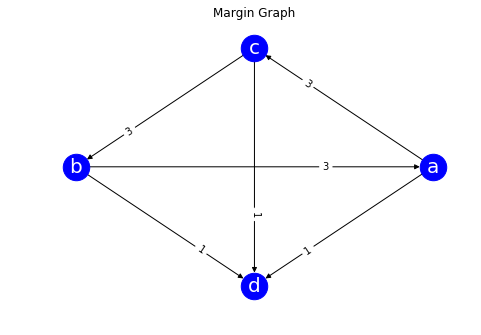

Split Cycle winners: {a, b, c}

---

CycleNum(a, b) = 3
CycleNum(b, c) = 3
CycleNum(b, d) = 0
CycleNum(c, d) = 0
CycleNum(a, d) = 0
CycleNum(a, c) = 3

---

SplitNum(a,c,b) = 3




In [11]:
# candidate names
cand_names=[a,b,c,d]

#candidate name map
cmap = cmap_abcd

anon_prof = {(d, b, a, c): 3,
             (a, d, c, b): 1,
             (a, c, b, d): 2,
             (c, b, d, a): 1,
             (c, b, a, d): 2} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_split_cycle_data(prof, cmap=cmap)


## Example from Section 3, item  3, pg. 12

+---+---+---+---+---+---+---+---+---+---+
| 2 | 1 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 2 |
+---+---+---+---+---+---+---+---+---+---+
| c | f | d | e | f | b | a | a | d | e |
| b | e | f | d | e | a | f | c | a | d |
| a | c | e | f | d | c | b | b | b | c |
| f | b | a | b | c | e | c | d | c | b |
| e | d | c | a | b | d | d | f | e | a |
| d | a | b | c | a | f | e | e | f | f |
+---+---+---+---+---+---+---+---+---+---+


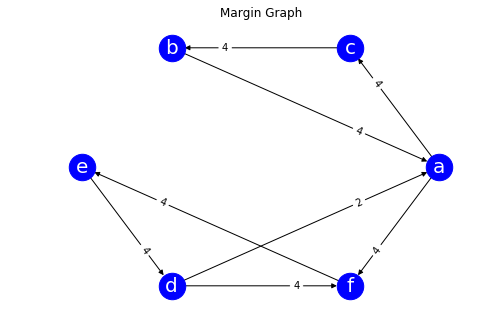

Split Cycle winners: {a, b, c, d, e}

---

CycleNum(a, b) = 4
CycleNum(b, c) = 4
CycleNum(c, f) = 0
CycleNum(b, d) = 0
CycleNum(e, f) = 4
CycleNum(b, e) = 0
CycleNum(c, e) = 0
CycleNum(b, f) = 0
CycleNum(a, f) = 2
CycleNum(a, e) = 2
CycleNum(c, d) = 0
CycleNum(a, d) = 2
CycleNum(d, e) = 4
CycleNum(a, c) = 4
CycleNum(d, f) = 4

---

SplitNum(a,c,b) = 4
SplitNum(d,f,e) = 4
SplitNum(a,f,e,d) = 2




In [12]:
# candidate names
cand_names=[a,b,c,d,e,f]

#candidate name map
cmap = cmap_abcdef

anon_prof = {(b,a,c,e,d,f): 2,
             (e,d,f,b,a,c): 2,
             (a,c,b,d,f,e): 2,
             (d,f,e,a,c,b): 2,
             (c,b,a,f,e,d): 2,
             (f,e,d,c,b,a): 2,
             (a,f,b,c,d,e): 2,
             (e,d,c,b,a,f): 2,
             (d,a,b,c,e,f): 1,
             (f,e,c,b,d,a): 1} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_split_cycle_data(prof, cmap=cmap)


## Example 3.7

+---+---+---+---+---+---+
| 2 | 7 | 4 | 1 | 3 | 7 |
+---+---+---+---+---+---+
| c | d | e | d | c | e |
| d | a | c | e | b | b |
| b | c | b | a | a | a |
| a | b | a | b | d | d |
| e | e | d | c | e | c |
+---+---+---+---+---+---+


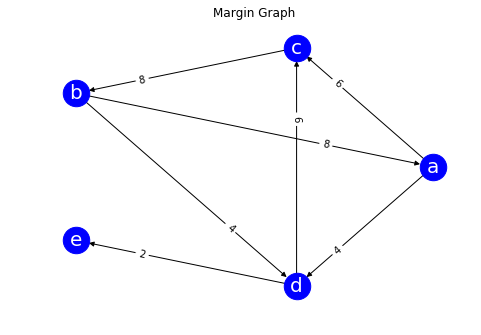

Split Cycle winners: {d}

---

CycleNum(a, b) = 6
CycleNum(b, c) = 6
CycleNum(b, d) = 4
CycleNum(b, e) = 0
CycleNum(c, e) = 0
CycleNum(c, d) = 4
CycleNum(a, e) = 0
CycleNum(a, d) = 4
CycleNum(d, e) = 0
CycleNum(a, c) = 6

---

SplitNum(a,c,b) = 6
SplitNum(b,d,c) = 4
SplitNum(a,d,c,b) = 4




In [13]:

cand_names=[a,b,c,d,e]

#candidate name map
cmap = cmap_abcde

anon_prof = {(e, c, b, a, d):4,
             (c, b, a, d, e):3,
             (e, b, a, d, c):7,
             (d, a, c, b, e):7,
             (c, d, b, a, e):2,
             (d, e, a, b, c):1} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_split_cycle_data(prof, cmap=cmap)



## Comparison with Beat Path (Lemma 3.15 and footnote 8)

**Lemma (3.15)**.   For any profile, the set of Beat Path winners is a subset of the set of Split Cycle winners. 

Both the [Schulze's Beat Path](https://arxiv.org/pdf/1804.02973.pdf) method  and Split Cycle can be implemented using a variation of the [Floyd-Warshall algorithm](https://www.programiz.com/dsa/floyd-warshall-algorithm).   

In [14]:
# Implementation of Beat Path using the Floyd Warshall-Algorithm
def beatpath_faster(prof):   
    """Beat Path (faster)"""
    mg = [[-np.inf for _ in prof.candidates] for _ in prof.candidates]
    for c1 in prof.candidates:
        for c2 in prof.candidates:
            if (prof.support(c1,c2) > prof.support(c2,c1) or c1 == c2):
                mg[c1][c2] = prof.support(c1,c2) - prof.support(c2,c1)
    strength = map(lambda i : map(lambda j : j , i) , mg) 
    for i in prof.candidates:         
        for j in prof.candidates: 
            if i!= j:
                for k in prof.candidates: 
                    if i!= k and j != k:
                        strength[j][k] = max(strength[j][k], min(strength[j][i],strength[i][k]))
    winners = {i:True for i in prof.candidates}
    for i in prof.candidates: 
        for j in prof.candidates:
            if i!=j:
                if strength[j][i] > strength[i][j]:
                    winners[i] = False
    return sorted([c for c in prof.candidates if winners[c]])


# Implementation of Split Cycle by adapting the Floyd-Warshall Algorithm
def splitcycle_faster(prof):   
    """Split Cycle (faster)"""
    weak_condorcet_winners = {c:True for c in prof.candidates}
    mg = [[-np.inf for _ in prof.candidates] for _ in prof.candidates]
    for c1 in prof.candidates:
        for c2 in prof.candidates:
            if (prof.support(c1,c2) > prof.support(c2,c1) or c1 == c2):
                mg[c1][c2] = prof.support(c1,c2) - prof.support(c2,c1)
                weak_condorcet_winners[c2] = weak_condorcet_winners[c2] and (c1 == c2)
    
    strength = map(lambda i : map(lambda j : j , i) , mg) 
    for i in prof.candidates:         
        for j in prof.candidates: 
            if i!= j:
                if not weak_condorcet_winners[j]:
                    for k in prof.candidates: 
                        if i!= k and j != k:
                            strength[j][k] = max(strength[j][k], min(strength[j][i],strength[i][k]))
    winners = {i:True for i in prof.candidates}
    for i in prof.candidates: 
        for j in prof.candidates:
            if i!=j:
                if mg[j][i] > strength[i][j]:
                    winners[i] = False
    return sorted([c for c in prof.candidates if winners[c]])


+---+---+---+---+
| 1 | 2 | 2 | 1 |
+---+---+---+---+
| d | c | b | c |
| b | a | a | d |
| c | d | d | b |
| a | b | c | a |
+---+---+---+---+


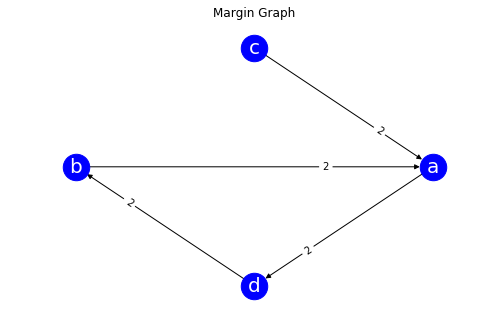

Split Cycle (faster) winners: {b, c, d}
Beat Path (faster) winners: {c}


In [15]:
# Example in which Beat Path winners are a strict subset of Split Cycle winners
cand_names=[a,b,c,d]

#candidate name map
cmap = cmap_abcde

anon_prof = {(d, b, c, a):1,
             (c, a, d, b):2,
             (c, d, b, a):1,
             (b, a, d, c):2} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(beatpath_faster, prof)



## Immunity to Spoilers

A voting method $F$ satisfies **immunity to spoilers** if for every profile $\mathbf{P}$ and $a,b\in X(\mathbf{P})$, if $a\in F(\mathbf{P}_{-b})$ and $Margin_\mathbf{P}(a,b)> 0$ and $b\not\in F(\mathbf{P})$, then $a\in F(\mathbf{P})$.

**Proposition** Beat Path and Ranked Pairs are not immune to spoilers. 

### Beat Path is not immune to spoilers.

+---+---+---+---+---+
| 9 | 5 | 2 | 4 | 3 |
+---+---+---+---+---+
| b | d | d | d | a |
| a | c | a | c | c |
| c | b | c | a | b |
| d | a | b | b | d |
+---+---+---+---+---+


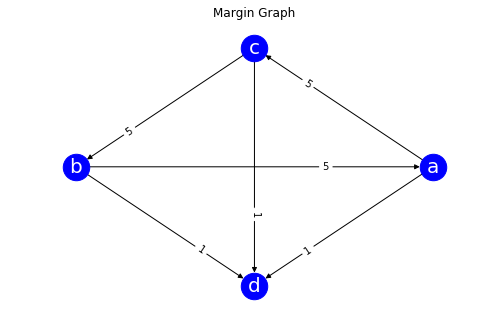

Split Cycle (faster) winners: {a, b, c}
Beat Path (faster) winners: {a, b, c}


In [16]:
# profile without candidate e

cand_names=[a,b,c,d]

#candidate name map
cmap = cmap_abcd


anon_prof = {(b, a, c, d):9,
             (a, c, b, d):3,
             (d, a, c, b):2,
             (d, c, b, a):5,
             (d, c, a, b):4} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(beatpath_faster, prof)



+---+---+---+---+---+---+---+---+
| 3 | 4 | 5 | 1 | 3 | 2 | 1 | 4 |
+---+---+---+---+---+---+---+---+
| a | b | d | d | b | b | d | d |
| e | e | e | e | a | a | a | c |
| c | a | c | a | c | c | e | a |
| b | c | b | c | e | d | c | b |
| d | d | a | b | d | e | b | e |
+---+---+---+---+---+---+---+---+


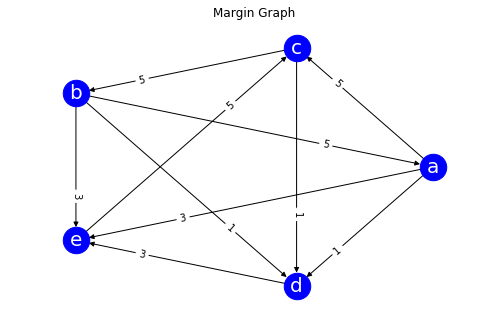

Split Cycle (faster) winners: {a, b, d}
Beat Path (faster) winners: {d}


In [17]:
# profile with candidate e

cand_names=[a,b,c,d,e]

#candidate name map
cmap = cmap_abcde

anon_prof = {(b, a, c, d, e):2,
             (b, a, c, e, d):3,
             (a, e, c, b, d):3,
             (d, e, a, c, b):1,
             (d, a, e, c, b):1,
             (d, e, c, b, a):5,
             (b, e, a, c, d):4,
             (d, c, a, b, e):4} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(beatpath_faster, prof)

### Ranked Pairs is not immune to spoilers.

+---+----+---+----+---+---+---+---+---+
| 3 | 16 | 1 | 13 | 3 | 4 | 7 | 1 | 5 |
+---+----+---+----+---+---+---+---+---+
| d | c  | b | b  | b | c | d | a | a |
| b | d  | a | a  | c | a | a | c | b |
| c | a  | c | d  | d | b | b | b | c |
| a | b  | d | c  | a | d | c | d | d |
+---+----+---+----+---+---+---+---+---+


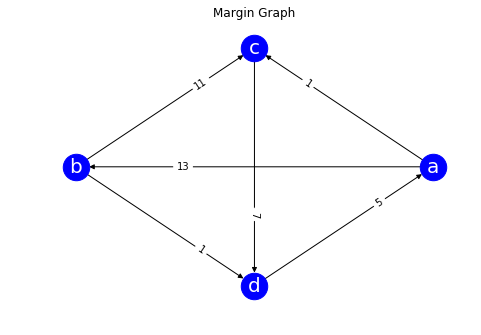

Split Cycle (faster) winners: {a}
Beat Path (faster) winners: {a}
Ranked Pairs winners: {a}


In [18]:
# profile without candidate e

cand_names=[a,b,c,d]

#candidate name map
cmap = cmap_abcd

anon_prof = {(a, b, c, d):5,
             (b, c, d, a):3,
             (c, d, a, b):16,
             (a, c, b, d):1,
             (d, a, b, c):7,
             (c, a, b, d):4,
             (d, b, c, a):3,
             (b, a, c, d):1,
             (b, a, d, c):13} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(beatpath_faster, prof)
display_winners(ranked_pairs, prof)

+---+----+---+---+---+---+---+---+---+----+
| 1 | 13 | 7 | 4 | 3 | 4 | 5 | 1 | 3 | 12 |
+---+----+---+---+---+---+---+---+---+----+
| e | e  | d | c | b | c | a | e | e | c  |
| b | b  | a | a | c | e | b | a | d | d  |
| a | a  | b | e | e | d | c | c | b | a  |
| c | d  | c | b | d | a | d | b | c | e  |
| d | c  | e | d | a | b | e | d | a | b  |
+---+----+---+---+---+---+---+---+---+----+


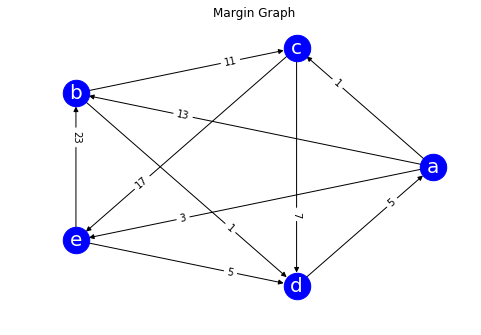

Split Cycle (faster) winners: {a, c}
Beat Path (faster) winners: {a}
Ranked Pairs winners: {c}


In [19]:
# profile with candidate e

cand_names=[a,b,c,d,e]

#candidate name map
cmap = cmap_abcde

anon_prof = {(a, b, c, d, e):5,
             (b, c, e, d, a):3,
             (c, e, d, a, b):4,
             (e, a, c, b, d):1,
             (d, a, b, c, e):7,
             (c, a, e, b, d):4,
             (e, d, b, c, a):3,
             (e, b, a, c, d):1,
             (e, b, a, d, c):13,
             (c, d, a, e, b):12} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(beatpath_faster, prof)
display_winners(ranked_pairs, prof)

## Stability of Winners

A voting method $F$ satisfies **stability for winners** (resp. **strong stability for winners**) if for every profile $\mathbf{P}$ and $a,b\in X(\mathbf{P})$, if $a\in F(\mathbf{P}_{-b})$ and $Margin_\mathbf{P}(a,b)> 0$ (resp. $Margin_\mathbf{P}(a,b)\geq 0$), then $a\in F(\mathbf{P})$.

+---+---+---+
| 3 | 3 | 3 |
+---+---+---+
| b | c | a |
| a | b | c |
| c | a | b |
+---+---+---+


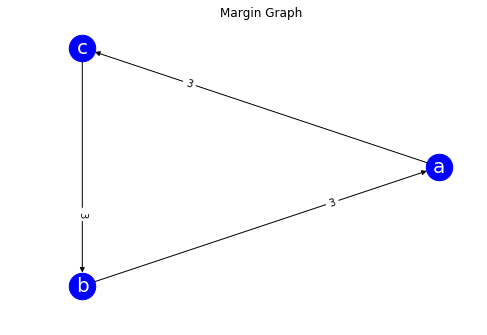

Split Cycle (faster) winners: {a, b, c}
MiniMax winners: {a, b, c}
Beat Path (faster) winners: {a, b, c}


In [20]:
# profile without candidate d

cand_names=[a,b,c]

#candidate name map
cmap = cmap_abc

anon_prof = {(c, b, a):3,
             (b, a, c):3,
             (a, c, b):3} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(minimax, prof)
display_winners(beatpath_faster, prof)


+---+---+---+---+
| 2 | 3 | 3 | 1 |
+---+---+---+---+
| b | c | d | d |
| a | b | a | b |
| d | a | c | a |
| c | d | b | c |
+---+---+---+---+


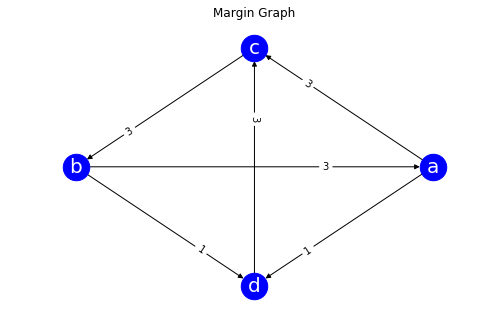

Split Cycle (faster) winners: {a, b, d}
MiniMax winners: {d}
Beat Path (faster) winners: {d}


In [21]:
# profile without candidate d

cand_names=[a,b,c,d]

#candidate name map
cmap = cmap_abcd

anon_prof = {(c, b, a, d):3,
             (b, a, d, c):2,
             (d, b, a, c):1,
             (d, a, c, b):3} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(minimax, prof)
display_winners(beatpath_faster, prof)


## Amalgamation

Two profiles $\mathbf{P}$ and $\mathbf{P}'$ are **almagamable** if $V(\mathbf{P})=V(\mathbf{P}')$ and for every $x,y\in X(\mathbf{P})\cap X(\mathbf{P}')$ and $i\in V(\mathbf{P})$, $x\mathbf{P}_i y$ if and only if $x\mathbf{P}'_i y$. An \textit{amalgamation of $\mathbf{P}$ and $\mathbf{P}'$} is any profile $\mathbf{Q}: V(\mathbf{P})\to \mathcal{L}(X(\mathbf{P})\cup X(\mathbf{P}'))$ such that for all $i\in V(\mathbf{P})$:

1. if $x,y\in X(\mathbf{P})$, then $x\mathbf{Q}_i y$ if and only if $x\mathbf{P}_i y$;
2. if $x,y\in X(\mathbf{P}')$, then $x\mathbf{Q}_i y$ if and only if $x\mathbf{P}'_i y$.

A voting method $F$ satisfying **amalgamation** if for any two amalgamable profiles $\mathbf{P}$ and $\mathbf{P}'$, if $a\in F(\mathbf{P})\cap F(\mathbf{P}')$, then for any amalgamation $\mathbf{Q}$ of $\mathbf{P}$ and $\mathbf{P}'$, $a\in F(\mathbf{Q})$.

Split Cycle satisfies amalgamation.


Profile 1

+---+---+---+---+---+
| 4 | 2 | 1 | 4 | 1 |
+---+---+---+---+---+
| d | d | c | b | c |
| a | c | b | a | b |
| c | b | a | c | d |
| b | a | d | d | a |
+---+---+---+---+---+


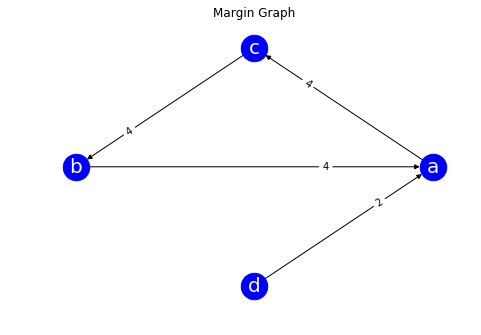

Split Cycle (faster) winners: {b, c, d}
MiniMax winners: {d}
Beat Path (faster) winners: {d}
Ranked Pairs winners: {b, c, d}

Profile 2

+---+---+---+---+
| 4 | 4 | 2 | 2 |
+---+---+---+---+
| d | b | f | b |
| f | e | e | f |
| e | d | d | e |
| b | f | b | d |
+---+---+---+---+


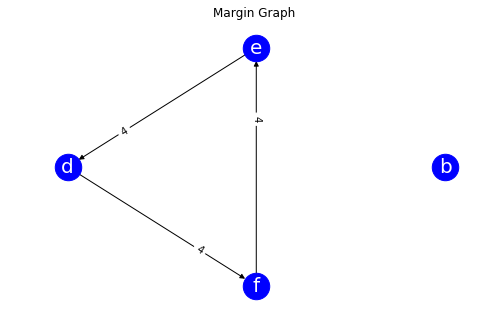

Split Cycle (faster) winners: {b, d, e, f}
MiniMax winners: {b}
Beat Path (faster) winners: {b, d, e, f}
Ranked Pairs winners: {b, d, e, f}


In [22]:

cand_names1=[a,b,c,d]

cmap1 = cmap_abcd

anon_prof1 = {(d, a, c, b):4,
             (d, c, b, a):2,
             (c, b, d, a):1,
             (c, b, a, d):1,
             (b, a, c, d):4} 

# create a profile given the anonymous profile and the candidate names 
prof1 = create_profile_opt_from_anon_profile(anon_prof1, candidate_names=cand_names1, cmap=cmap1) 

print "\nProfile 1\n"
#display the profile
prof1.display_anon()

# display the margin graph
display_margin_graph(prof1)

display_winners(splitcycle_faster, prof1)
display_winners(minimax, prof1)
display_winners(beatpath_faster, prof1)
display_winners(ranked_pairs, prof1)


cand_names2=[b,d,e,f]

cmap2 = {b:"b", d:"d", e:"e", f:"f"}

anon_prof2 = {(d, f, e, b):4,
             (f, e, d, b):2,
             (b, f, e, d):2,
             (b, e, d, f):4} 

print "\nProfile 2\n"

# create a profile given the anonymous profile and the candidate names 
prof2 = create_profile_opt_from_anon_profile(anon_prof2, candidate_names=cand_names2, cmap=cmap2) 

#display the profile
prof2.display_anon()

# display the margin graph
display_margin_graph(prof2)

display_winners(splitcycle_faster, prof2)
display_winners(minimax, prof2)
display_winners(beatpath_faster, prof2)
display_winners(ranked_pairs, prof2)



+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 3 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| c | f | d | b | d | b | c |
| b | e | a | e | f | a | b |
| a | d | f | a | a | e | f |
| f | c | c | c | c | c | e |
| e | b | e | d | e | d | d |
| d | a | b | f | b | f | a |
+---+---+---+---+---+---+---+


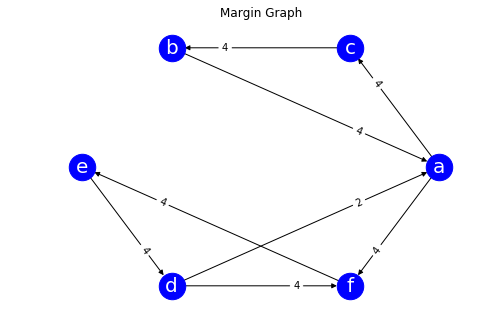

Split Cycle (faster) winners: {a, b, c, d, e}
MiniMax winners: {a, b, c, d, e, f}
Beat Path (faster) winners: {a, b, c}


In [23]:
# Amalgamation of the two profiles


cand_names = [a,b,c,d,e,f]

cmap = cmap_abcdef

anon_prof = {(d, f, a, c, e, b):1,
             (d, a, f, c, e, b):3,
             (f, e, d, c, b, a):2,
             (c, b, f, e, d, a):1,
             (c, b, a, f, e, d):1,
             (b, e, a, c, d, f):3,
             (b, a, e, c, d, f):1} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(minimax, prof)
display_winners(beatpath_faster, prof)
# Uncomment to see the Ranked Pairs winners (Warning: It takes a really long time to run!)
#display_winners(ranked_pairs, prof)


## Smith and Schwartz Criteria


Let $\mathbf{P}$ be a profile and $S\subseteq X(\mathbf{P})$. Then $S$ is **$\to_\mathbf{P}$-dominant** if for all $x\in S$ and $y\in X\setminus S$, we have $x\to_\mathbf{P}y$. Define
$GETCHA(\mathbf{P})=\bigcap \{S\subseteq X\mid S\mbox{ is $\to_\mathbf{P}$-dominant}\}.$


We also call the Smith set the GETCHA set (GETCHA stands for 'generalized top-choice assumption').

A voting method $F$ satisfies the \textit{Smith criterion} if for any profile $\mathbf{P}$, $F(\mathbf{P})\subseteq GETCHA(\mathbf{P})$.  
 




Let $\mathbf{P}$ be a profile and $S\subseteq X(\mathbf{P})$. Then $S$ is **$\to_\mathbf{P}$-undominated** if for all $x\in S$ and $y\in X\setminus S$, we have $y\not\to_\mathbf{P}x$. Define $GOCHA(\mathbf{P})=\bigcup \{S\subseteq X\mid S\mbox{ is $\to_\mathbf{P}$-undominated and no }S'\subsetneq S\mbox{ is $\to_\mathbf{P}$-undominated}\}.$


The GOCHA set ('GOCHA' stands for 'generalized optimal choice axiom') is also called the Schwartz set.

**Lemma (Schwartz 1986, Corollary 6.2.2**.   Let $\mathbf{P}$ be any profile, and let $\to_\mathbf{P}^*$ be the transitive closure of $\to_\mathbf{P}$, i.e., $a\to_\mathbf{P}^*b$ if and only if there are $x_1,\dots , x_n\in X(\mathbf{P})$ with $a=x_1$ and $b=x_n$ such that $x_1\to_\mathbf{P}\dots \to_\mathbf{P}x_n$. Then $GOCHA(\mathbf{P})=\{x\in X(\mathbf{P})\mid \mbox{there is no }y\in X(\mathbf{P}): y\to_\mathbf{P}^*x\mbox{ and }x\not\to_\mathbf{P}^*y\}.$


A voting method $F$ satisfies the **Schwartz criterion** if for any profile $\mathbf{P}$, $F(\mathbf{P})\subseteq GOCHA(\mathbf{P})$.


Split Cycle satisfies the Smith criterion, but does not satisfy the Schwartz criterion.



In [24]:
def generate_weak_margin_graph(prof, min_margin = 0):
    '''generate the weak weighted margin graph'''
    mg = nx.DiGraph()
    mg.add_nodes_from(prof.candidates)
    mg.add_weighted_edges_from([(c1,c2,prof.support(c1,c2) - prof.support(c2,c1))  
           for c1 in prof.candidates 
           for c2 in prof.candidates if c1 != c2 if prof.support(c1,c2) - prof.support(c2,c1) >= min_margin])
    return mg

def getcha(prof):
    '''GETCHA''' 
    mg = generate_weak_margin_graph(prof)
    min_indegree = min([max([mg.in_degree(n) for n in comp]) for comp in nx.strongly_connected_components(mg)])
    smith = [comp for comp in nx.strongly_connected_components(mg) if max([mg.in_degree(n) for n in comp]) == min_indegree][0]
    return sorted(list(smith))

def gocha(prof):
    '''GOCHA''' 
    mg = generate_margin_graph(prof)
    transitive_closure =  nx.algorithms.dag.transitive_closure(mg)
    schwartz = set()
    for ssc in nx.strongly_connected_components(transitive_closure):
        if not any([transitive_closure.has_edge(c2,c1) 
                    for c1 in ssc for c2 in transitive_closure.nodes if c2 not in ssc]):
            schwartz =  schwartz.union(ssc)
    return sorted(list(schwartz))


+---+---+---+---+---+
| 4 | 2 | 1 | 4 | 1 |
+---+---+---+---+---+
| d | d | c | b | c |
| a | c | b | a | b |
| c | b | a | c | d |
| b | a | d | d | a |
+---+---+---+---+---+


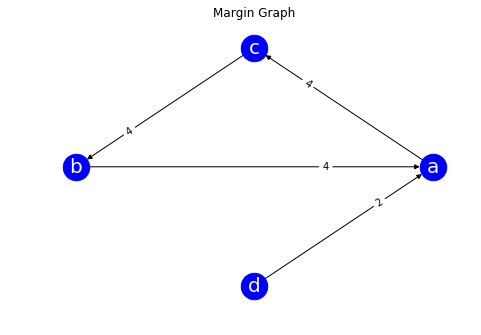

GETCHA winners: {a, b, c, d}
GOCHA winners: {d}
Split Cycle (faster) winners: {b, c, d}


In [25]:
# Variant from the profile used in the proof of Proposition 6.7

cand_names=[a,b,c,d]

cmap = cmap_abcd

anon_prof = {(d, a, c, b):4,
             (d, c, b, a):2,
             (c, b, d, a):1,
             (c, b, a, d):1,
             (b, a, c, d):4} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(getcha,prof)
display_winners(gocha,prof)
display_winners(splitcycle_faster,prof)


## Tideman Resolvability

A voting method $F$ satisfies **Tideman resolvability** if for any profile $\mathbf{P}$, if $|F(\mathbf{P})|>1$, then for any $x\in F(\mathbf{P})$, there is a profile $\mathbf{Q}$ with $V(\mathbf{P})\cap V(\mathbf{Q})=\varnothing$ and $|V(\mathbf{Q})|=1$ such that $F(\mathbf{P}+\mathbf{Q})=\{x\}$.
\end{definition}


Split Cycle does not satisfy Tideman resolvability.


+---+---+---+---+---+---+---+---+
| 2 | 2 | 1 | 2 | 1 | 1 | 2 | 1 |
+---+---+---+---+---+---+---+---+
| b | d | c | a | a | c | b | a |
| d | c | b | d | c | b | a | c |
| a | b | a | c | d | d | d | b |
| c | a | d | b | b | a | c | d |
+---+---+---+---+---+---+---+---+


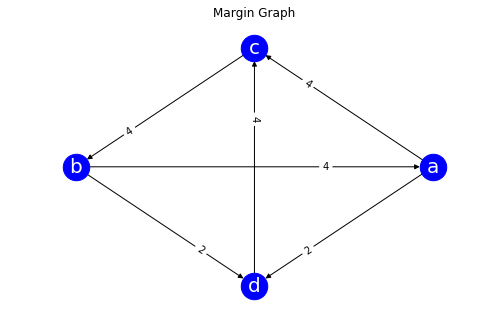

Split Cycle (faster) winners: {a, b, d}


In [26]:

cand_names=[a,b,c,d]

cmap = cmap_abcd

anon_prof = {(b, d, a, c):2,
             (b, a, d, c):2,
             (a, d, c, b):2, 
             (a, c, b, d):1, 
             (a, c, d, b):1, 
             (d, c, b, a):2, 
             (c, b, a, d):1,
             (c, b, d, a):1} 

# create a profile given the anonymous profile and the candidate names 
prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof.display_anon()

# display the margin graph
display_margin_graph(prof)

display_winners(splitcycle_faster,prof)


In [27]:
winning_sets = dict()

for r in prof.all_rankings:
    new_prof = prof.add_voter(r)
    sc_winners = splitcycle_faster(new_prof)
    if tuple(sc_winners) in winning_sets.keys():
        winning_sets[tuple(sc_winners)] += 1
    else:
        winning_sets.update({tuple(sc_winners): 1})
        
print "The original profile: \n"
prof.display_anon()
print " "

display_winners(splitcycle_faster, prof) 

print "\nPossible winning sets by adding a single voter to the above profile: "
for ws in winning_sets.keys():
    print "\t{} (the voter can use {} different rankings to get this outcome)".format("{" + ", ".join([cmap[_] for _ in ws]) + "}",
                                                                                    str(winning_sets[ws]))



The original profile: 

+---+---+---+---+---+---+---+---+
| 2 | 2 | 1 | 2 | 1 | 1 | 2 | 1 |
+---+---+---+---+---+---+---+---+
| b | d | c | a | a | c | b | a |
| d | c | b | d | c | b | a | c |
| a | b | a | c | d | d | d | b |
| c | a | d | b | b | a | c | d |
+---+---+---+---+---+---+---+---+
 
Split Cycle (faster) winners: {a, b, d}

Possible winning sets by adding a single voter to the above profile: 
	{b, d} (the voter can use 6 different rankings to get this outcome)
	{c, d} (the voter can use 2 different rankings to get this outcome)
	{a, c, d} (the voter can use 2 different rankings to get this outcome)
	{a, d} (the voter can use 6 different rankings to get this outcome)
	{a, b, d} (the voter can use 4 different rankings to get this outcome)
	{d} (the voter can use 2 different rankings to get this outcome)
	{b, c, d} (the voter can use 2 different rankings to get this outcome)


## Resolute Coalitional Participation

A voting method $F$ satisfies **resolute coalitional participation** if for any profiles $\mathbf{P}$ and $\mathbf{P}'$ with $X(\mathbf{P})=X(\mathbf{P}')$ and $x,y\in X$, if $F(\mathbf{P})=\{x\}$ and $x\mathbf{P}_i'y$ for all $i\in V(\mathbf{P}')$, then $F(\mathbf{P}+\mathbf{P}')\neq\{y\}$.

Split Cycle does not satisfy resolute coalitional participation.


First profile

+---+---+---+---+---+---+---+
| 2 | 1 | 2 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+
| d | c | b | b | c | a | a |
| c | a | a | d | b | d | d |
| b | d | d | c | a | c | b |
| a | b | c | a | d | b | c |
+---+---+---+---+---+---+---+


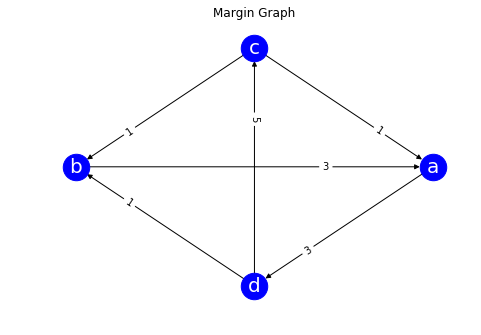

Split Cycle (faster) winners: {b}

Second profile with two new voters with the ranking c b d a

+---+---+---+---+---+---+---+---+
| 2 | 1 | 2 | 1 | 1 | 1 | 1 | 2 |
+---+---+---+---+---+---+---+---+
| d | c | b | b | c | a | a | c |
| c | a | a | d | b | d | d | b |
| b | d | d | c | a | c | b | d |
| a | b | c | a | d | b | c | a |
+---+---+---+---+---+---+---+---+


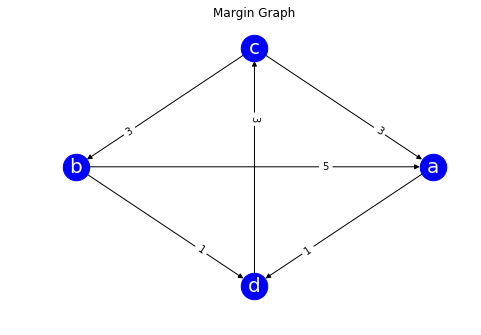

Split Cycle (faster) winners: {d}


In [28]:

cand_names=[a,b,c,d]

cmap = cmap_abcd

anon_prof1 = {(c, a, d, b):1,
             (a, d, c, b):1,
             (a, d, b, c):1,
             (b, d, c, a):1,
             (d, c, b, a):2,
             (c, b, a, d):1, 
             (b, a, d, c):2} 

# create a profile given the anonymous profile and the candidate names 
prof1 = create_profile_opt_from_anon_profile(anon_prof1, candidate_names=cand_names, cmap=cmap) 

print "First profile\n"
#display the profile
prof1.display_anon()

# display the margin graph
display_margin_graph(prof1)

display_winners(splitcycle_faster,prof1)


print "\nSecond profile with two new voters with the ranking c b d a\n"
anon_prof2 = {(c, a, d, b):1,
             (a, d, c, b):1,
             (a, d, b, c):1,
             (b, d, c, a):1,
             (d, c, b, a):2,
             (c, b, a, d):1, 
             (b, a, d, c):2,
             (c, b, d, a):2} 

# create a profile given the anonymous profile and the candidate names 
prof2 = create_profile_opt_from_anon_profile(anon_prof2, candidate_names=cand_names, cmap=cmap) 

#display the profile
prof2.display_anon()

# display the margin graph
display_margin_graph(prof2)

display_winners(splitcycle_faster,prof2)



## Negative Involvement

$F$ satisfies **positive involvement** if for any profiles $\mathbf{P}$ and $\mathbf{P}'$ with $X(\mathbf{P})=X(\mathbf{P}')$ and $|V(\mathbf{P}')|=1$, if $x\in F(\mathbf{P})$ and for $i\in V(\mathbf{P}')$, $x \mathbf{P}_i' y$ for all $y\in X(\mathbf{P}')\setminus \{x\}$, then $x\in F(\mathbf{P}+\mathbf{P}')$.

$F$ satisfies **negative involvement** if for any profiles $\mathbf{P}$ and $\mathbf{P}'$ with $X(\mathbf{P})=X(\mathbf{P}')$ and $|V(\mathbf{P}')|=1$, if $x\not\in F(\mathbf{P})$ and for $i\in V(\mathbf{P}')$, $y \mathbf{P}_i' x$ for all $y\in X(\mathbf{P}')\setminus \{x\}$, then $x\not\in F(\mathbf{P}+\mathbf{P}')$.

Split Cycle satisfies positive and negative involvement. Beat Path does not satisfy either positive involvement or negative involvement.  

First profile

+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| e | b | b | d | c | a | e | d |
| d | d | e | c | e | c | a | a |
| a | c | a | b | b | b | d | b |
| c | e | c | e | d | d | c | e |
| b | a | d | a | a | e | b | c |
+---+---+---+---+---+---+---+---+


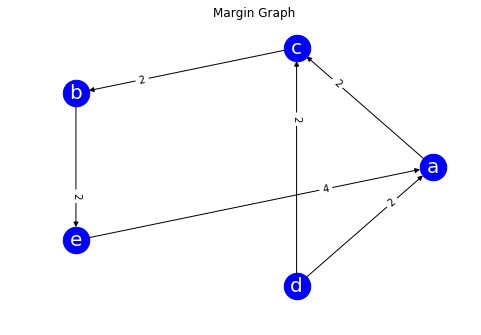

Split Cycle (faster) winners: {b, d, e}
Beat Path (faster) winners: {d}

Second profile with one new voter with the ranking a c b d e

+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 2 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| e | b | b | d | c | a | e | d |
| d | d | e | c | e | c | a | a |
| a | c | a | b | b | b | d | b |
| c | e | c | e | d | d | c | e |
| b | a | d | a | a | e | b | c |
+---+---+---+---+---+---+---+---+


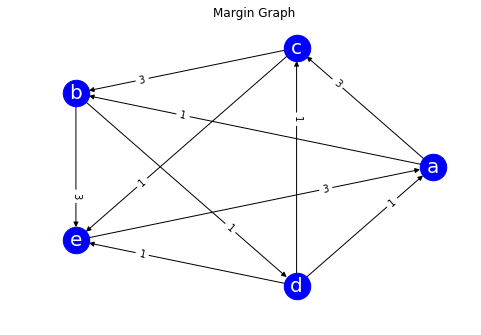

Split Cycle (faster) winners: {a, b, c, d, e}
Beat Path (faster) winners: {a, b, c, d, e}


In [29]:
cand_names=[a,b,c,d,e]

cmap = cmap_abcde

anon_prof1 = {(a, c, b, d, e):1,
              (e, a, d, c, b):1,
              (e, d, a, c, b):1,
              (d, a, b, e, c):1,
              (b, e, a, c, d):1, 
              (d, c, b, e, a):1,
              (c, e, b, d, a):1,
              (b, d, c, e, a):1} 

# create a profile given the anonymous profile and the candidate names 
prof1 = create_profile_opt_from_anon_profile(anon_prof1, candidate_names=cand_names, cmap=cmap) 

print "First profile\n"
#display the profile
prof1.display_anon()

# display the margin graph
display_margin_graph(prof1)

display_winners(splitcycle_faster,prof1)
display_winners(beatpath_faster,prof1)


anon_prof2 = {(a, c, b, d, e):2,
              (e, a, d, c, b):1,
              (e, d, a, c, b):1,
              (d, a, b, e, c):1,
              (b, e, a, c, d):1, 
              (d, c, b, e, a):1,
              (c, e, b, d, a):1,
              (b, d, c, e, a):1} 

# create a profile given the anonymous profile and the candidate names 
prof2 = create_profile_opt_from_anon_profile(anon_prof2, candidate_names=cand_names, cmap=cmap) 

print "\nSecond profile with one new voter with the ranking a c b d e\n"
#display the profile
prof2.display_anon()

# display the margin graph
display_margin_graph(prof2)

display_winners(splitcycle_faster,prof2)
display_winners(beatpath_faster,prof2)


## Additional  Examples



+---+---+---+---+---+---+
| 1 | 4 | 4 | 3 | 3 | 1 |
+---+---+---+---+---+---+
| a | a | b | d | b | e |
| b | e | c | a | d | c |
| c | c | e | c | a | d |
| e | d | d | e | e | a |
| d | b | a | b | c | b |
+---+---+---+---+---+---+


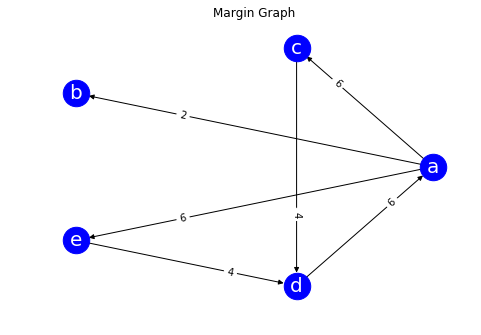

Split Cycle (faster) winners: {d}
Beat Path (faster) winners: {d}
MiniMax winners: {b}
GETCHA winners: {a, b, c, d, e}
GOCHA winners: {a, c, d, e}
Ranked Choice winners: {a}
Plurality winners: {b}


In [30]:
# Example profile from the chapter "Weighted Tournament Solutions" by Felix Fischer, Olivier Hudry, and Rolf Niedermeier
# in the Handbook of Computational Social Choice

cmap = cmap_abcde
cand_names = [a,b,c,d,e]

anon_prof = {(b, d, a, e, c): 3,
             (d, a, c, e, b): 3,
             (b, c, e, d, a): 4,
             (a, e, c, d, b): 4,
             (a, b, c, e, d): 1,
             (e, c, d, a, b): 1} 

prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 
prof.display_anon()

display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
## Uncomment for Ranked Pairs winner (Warning: takes a really long time!)
#display_winners(ranked_pairs, prof)
display_winners(beatpath_faster, prof)
display_winners(minimax, prof)
display_winners(getcha, prof)
display_winners(gocha, prof)
display_winners(hare, prof)
display_winners(plurality, prof)



+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| b | d | b | c | d | a | a | c |
| d | a | c | a | c | c | b | b |
| a | c | d | b | a | b | d | d |
| c | b | a | d | b | d | c | a |
+---+---+---+---+---+---+---+---+


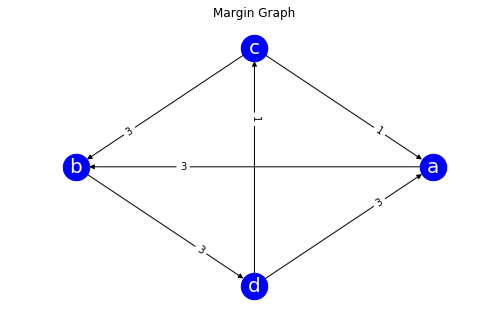

Split Cycle (faster) winners: {a, c, d}
Ranked Pairs winners: {c, d}
Beat Path (faster) winners: {c}
MiniMax winners: {c}
GETCHA winners: {a, b, c, d}
GOCHA winners: {a, b, c, d}
Ranked Choice winners: {d}
Plurality winners: {d}


In [31]:
# Example with different Split Cycle, Beat Path and Ranked Pairs winners

cmap = cmap_abcd
cand_names = [a,b,c,d]

anon_prof = {(b, d, a, c):1,
             (d, a, c, b):1,
             (b, c, d, a):1,
             (c, a, b, d):1,
             (c, b, 3, a):1,
             (d, c, a, b):2,
             (a, b, d, c):1,
             (a, 2, b, 3):1} 

prof = create_profile_opt_from_anon_profile(anon_prof, candidate_names=cand_names, cmap=cmap) 
prof.display_anon()

display_margin_graph(prof)

display_winners(splitcycle_faster, prof)
display_winners(ranked_pairs, prof)
display_winners(beatpath_faster, prof)
display_winners(minimax, prof)
display_winners(getcha, prof)
display_winners(gocha, prof)
display_winners(hare, prof)
display_winners(plurality, prof)
